# Multilayer Perceptron

We train a multilayer perceptron (MLP) to recognize handwritten digits using the MNIST dataset. An MLP is the simplest type of artificial neural network.

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
import pandas as pd
from sklearn.metrics import confusion_matrix

In [73]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


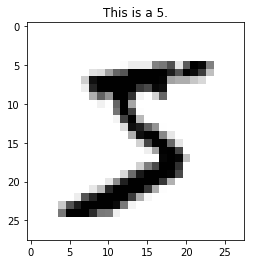

In [74]:
plt.title("This is a %d." % y_train[0])
_ = plt.imshow(X_train[0], cmap='binary')

Each digit is unrolled into a 1-dimensional array, and the values are rescaled from 0-255 to 0-1.

In [75]:
X_train = X_train.reshape(-1, 784).astype('float') / 255
X_test = X_test.reshape(-1, 784).astype('float') / 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

Now we build a neural network. It has one dense hidden layer with 64 nodes

In [76]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2594 - acc: 0.9266
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1206 - acc: 0.9641
Epoch 3/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0887 - acc: 0.9739
Epoch 4/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0728 - acc: 0.9788
Epoch 5/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0611 - acc: 0.9825
Epoch 6/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0521 - acc: 0.9859
Epoch 7/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0455 - acc: 0.9872
Epoch 8/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0400 - acc: 0.9889
Epoch 9/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0351 - acc: 0.9904
Epoch 10/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0312 - a

In [77]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 52us/step


[0.10429392617428894, 0.9773]

In [78]:
y_true = y_test.argmax(axis=1)
y_pred = model.predict(X_test).argmax(axis=1)

In [79]:
pd.DataFrame(confusion_matrix(y_true, y_pred), index=range(10), columns=range(10))

,0,1,2,3,4,5,6,7,8,9
0,970,0,1,1,1,2,3,1,1,0
1,0,1128,3,1,0,1,2,0,0,0
2,4,2,999,3,3,1,2,9,9,0
3,0,1,6,981,0,9,0,3,1,9
4,0,0,3,1,969,0,4,0,0,5
5,2,0,0,4,1,874,5,0,3,3
6,3,3,1,0,5,9,937,0,0,0
7,2,4,9,4,1,0,0,999,2,7
8,6,2,3,5,5,10,3,2,931,7
9,1,2,0,0,10,9,0,2,0,985
